Notebook to do all the plotting in

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

per dataset - subset - n

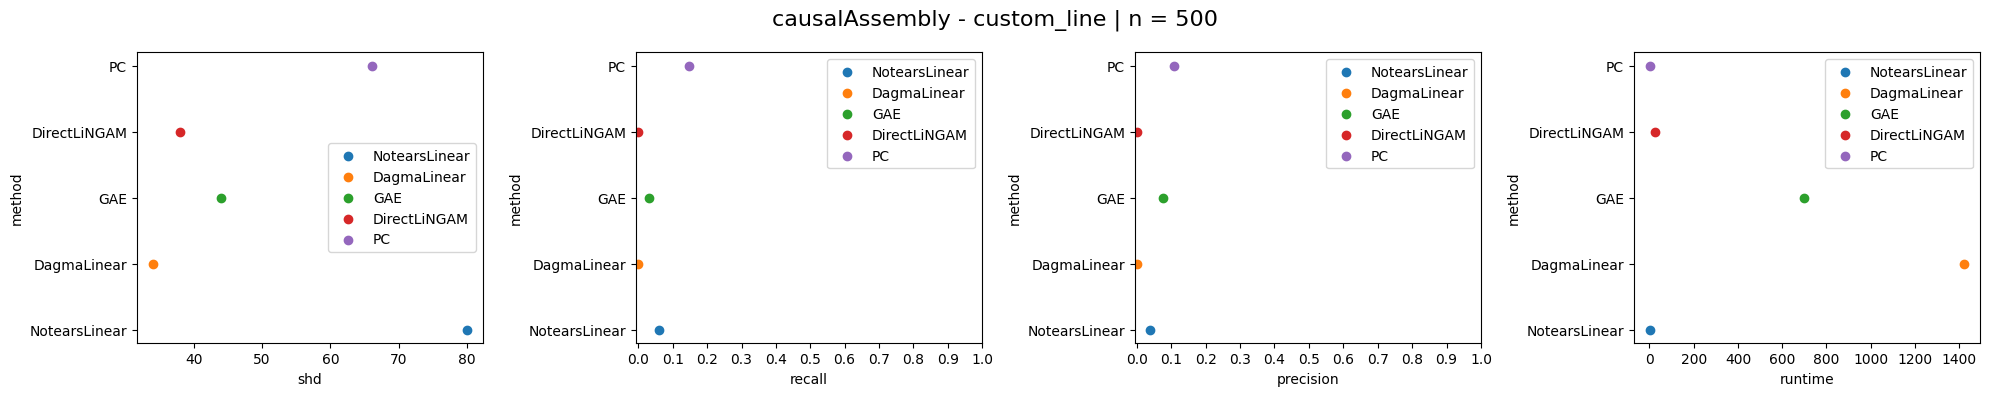

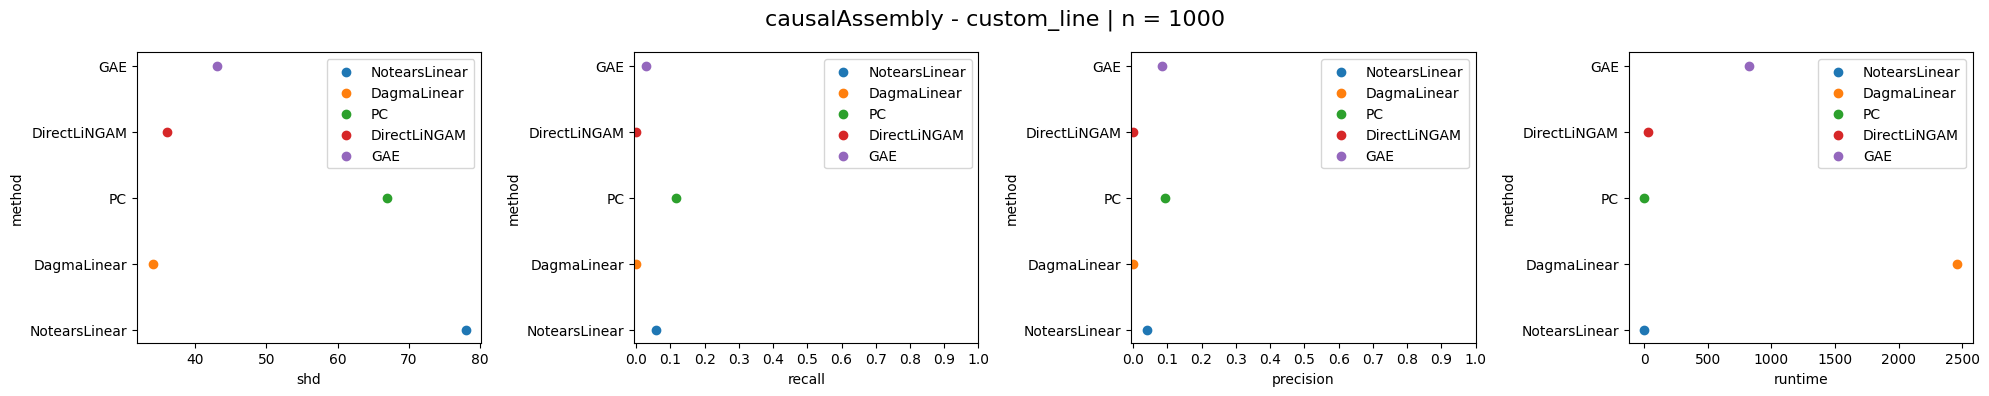

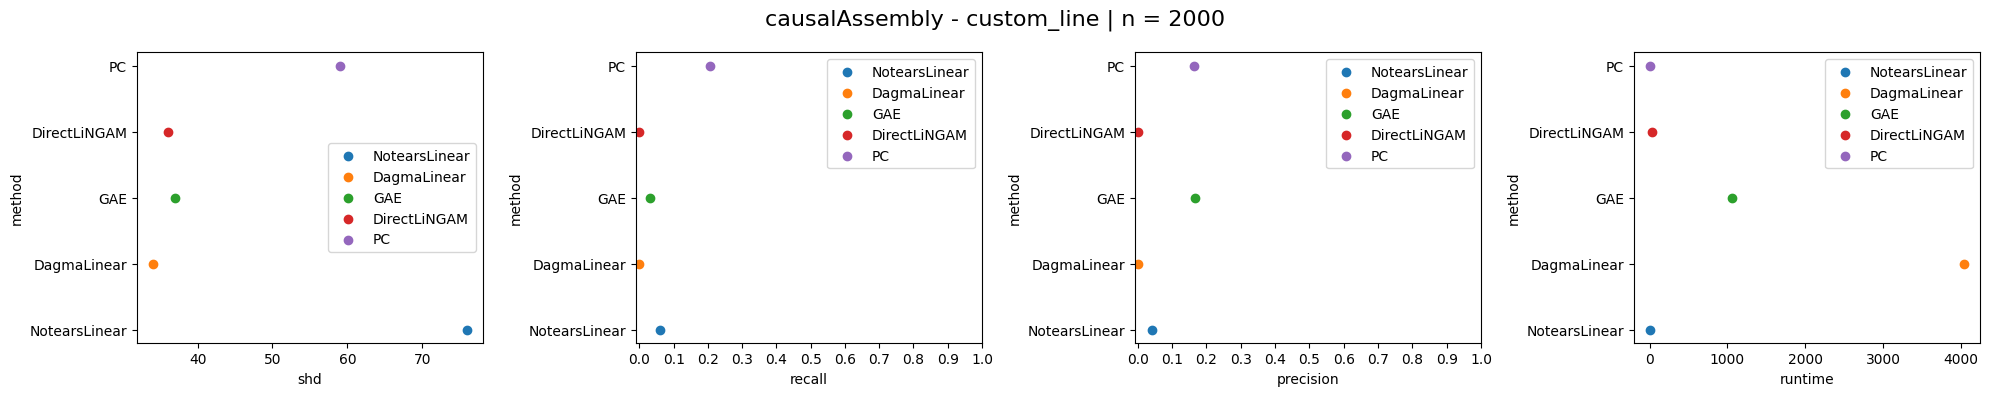

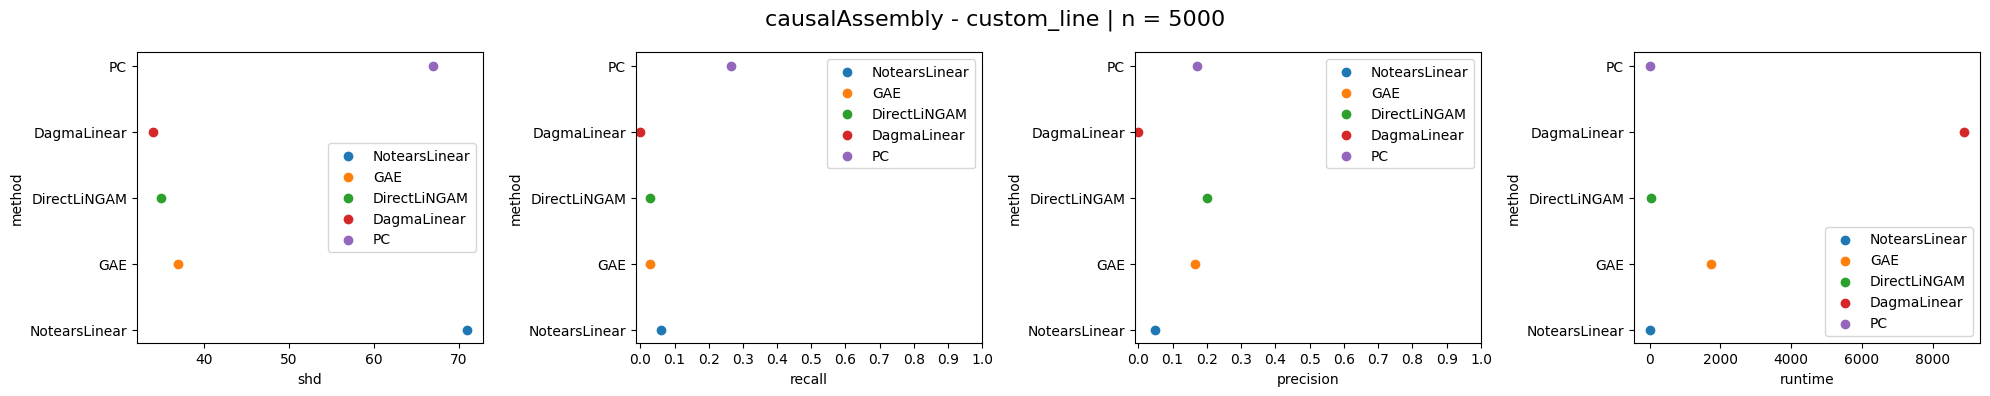

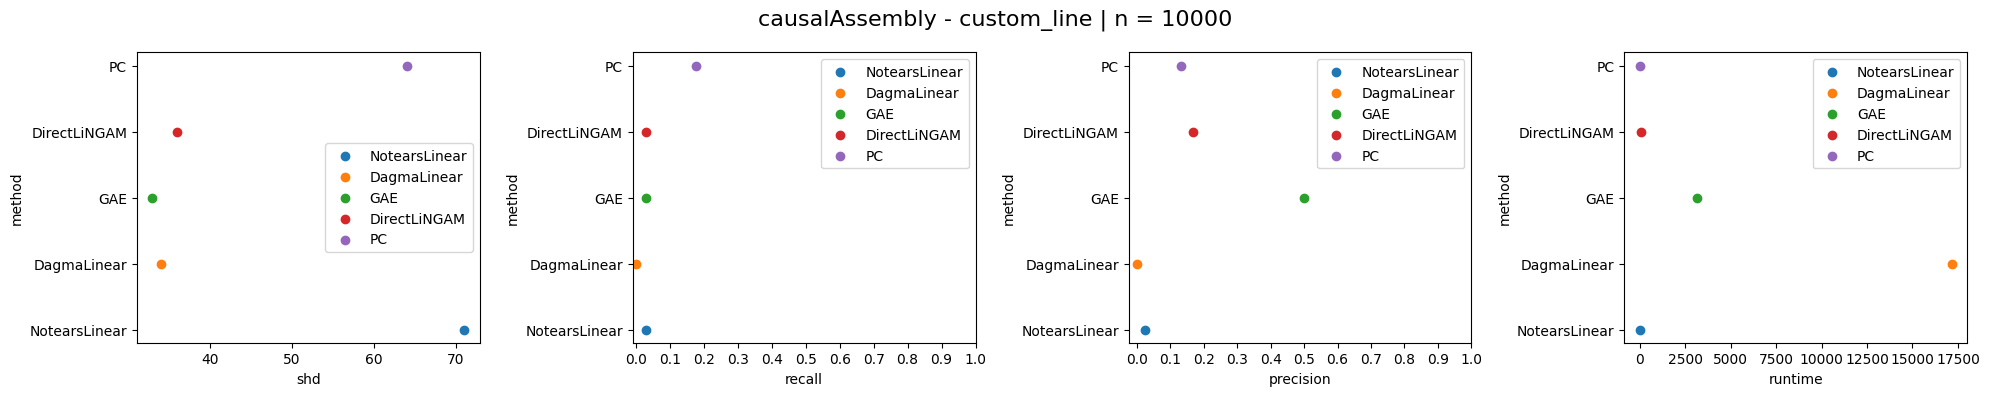

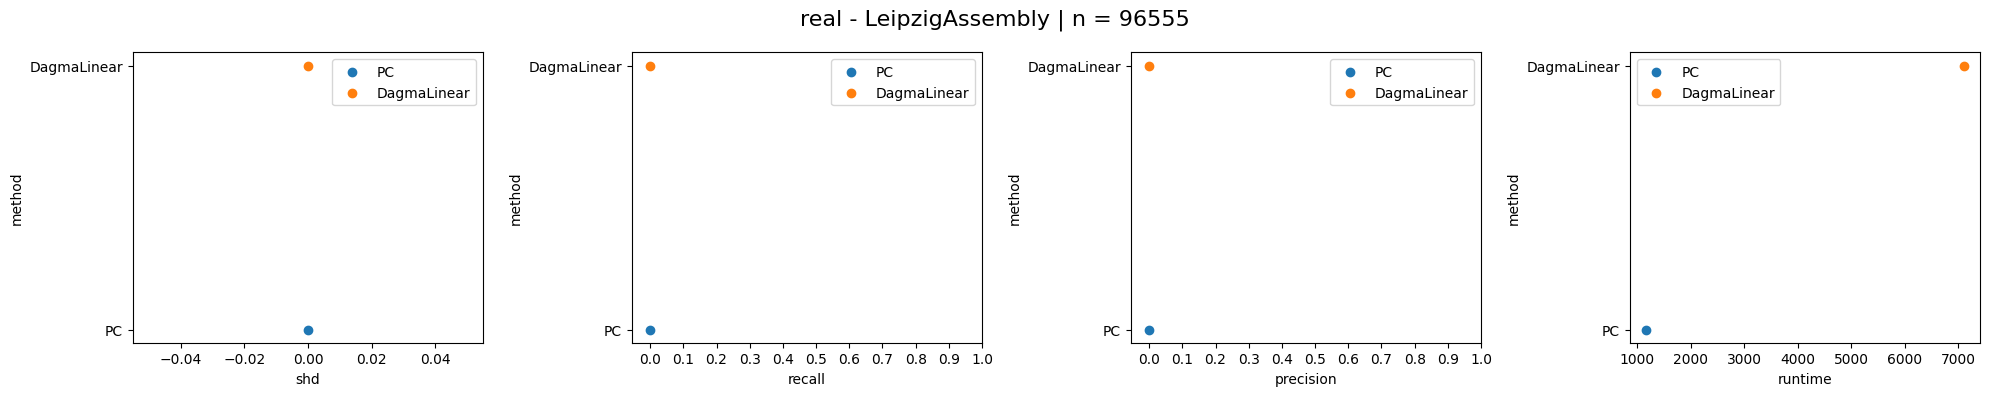

In [2]:
import matplotlib.pyplot as plt
import numpy as np

testing_results = pd.read_csv('testing_results.csv')
testing_results = testing_results.fillna(0)

# narrow down dataset
# testing_results = testing_results[testing_results['dataset'] == 'IID']

testing_results = testing_results[
                                #     (testing_results['dataset'] == 'causalAssembly')
                                #   & (testing_results['subset'] == 'custom_line')
                                  (testing_results['date'] >= '2024-06-25 16:00:00')
                                  ]

# clean up testing data
testing_results.drop_duplicates(subset=['method', 'n'], inplace=True)
testing_results.sort_values(by='n', inplace=True)

# specify metrics
metrics = ['shd', 'recall', 'precision', 'runtime']  

for dataset in testing_results['dataset'].unique():
    dataset_results = testing_results[testing_results['dataset'] == dataset]
    
    for subset in dataset_results['subset'].unique():
        subset_results = dataset_results[dataset_results['subset'] == subset]
        
        for n in subset_results['n'].unique():
            subset_results_n = subset_results[subset_results['n'] == n]
            
            # Create a figure with the desired number of subplots (one for each metric)
            fig, axes = plt.subplots(1, len(metrics), figsize=(20, 4))

            # Set the overall title
            fig.suptitle(f'{dataset} - {subset} | n = {n}', fontsize=16)
            
            for i, metric in enumerate(metrics):
                ax = axes[i]
                
                for method in subset_results_n['method'].unique():
                    method_results = subset_results_n[subset_results_n['method'] == method]
                    ax.scatter(method_results[metric], method_results['method'], label=method)
                
                # ax.set_title(f'{dataset} - {subset} | n = {n} | {metric}')
                ax.set_xlabel(metric)
                if metric not in ('shd', 'runtime'):
                    ax.set_xticks(np.arange(0, 1.1, 0.1))
                ax.set_ylabel('method')
                ax.legend()
            
            plt.tight_layout()
            plt.show()

per dataset - subset: 
comparison of all adj_matrix vs ground_truth

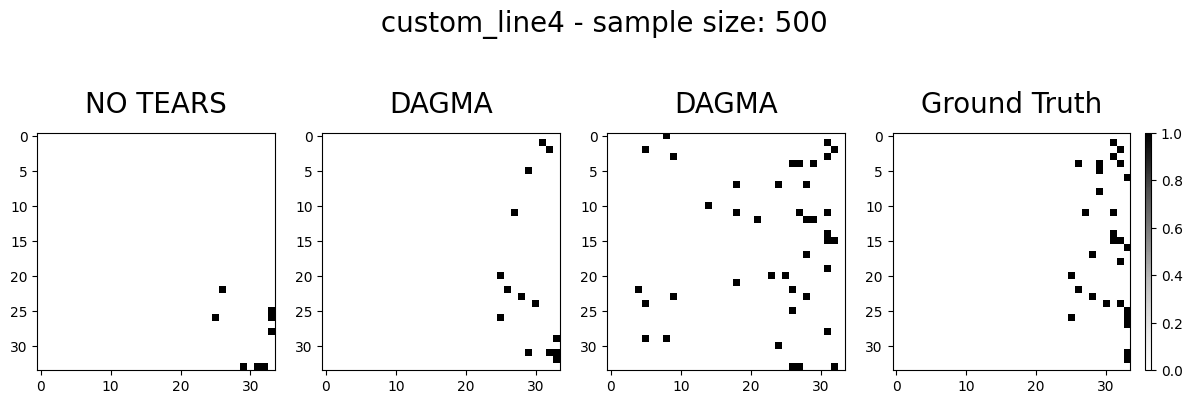

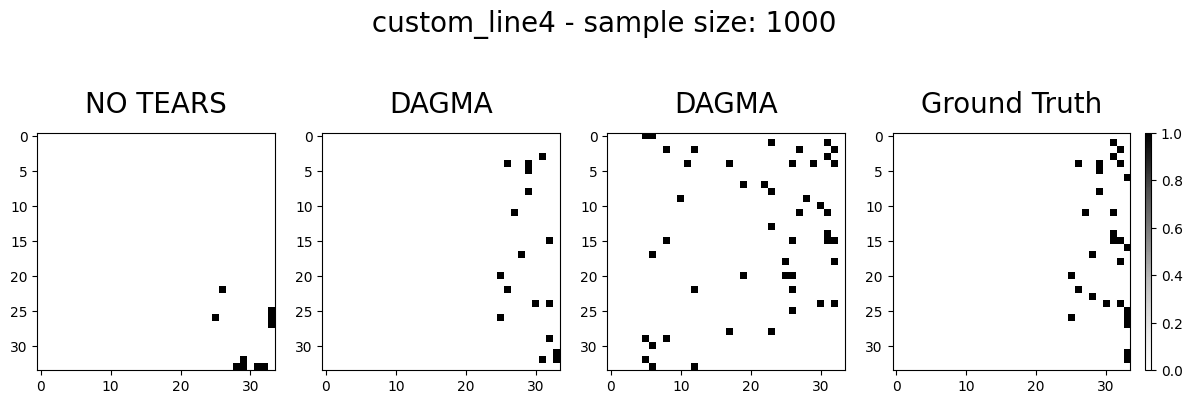

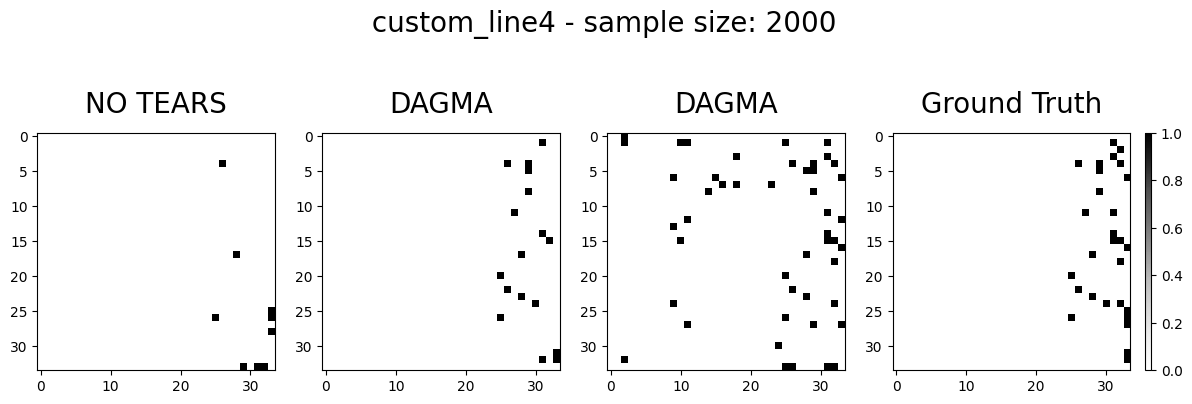

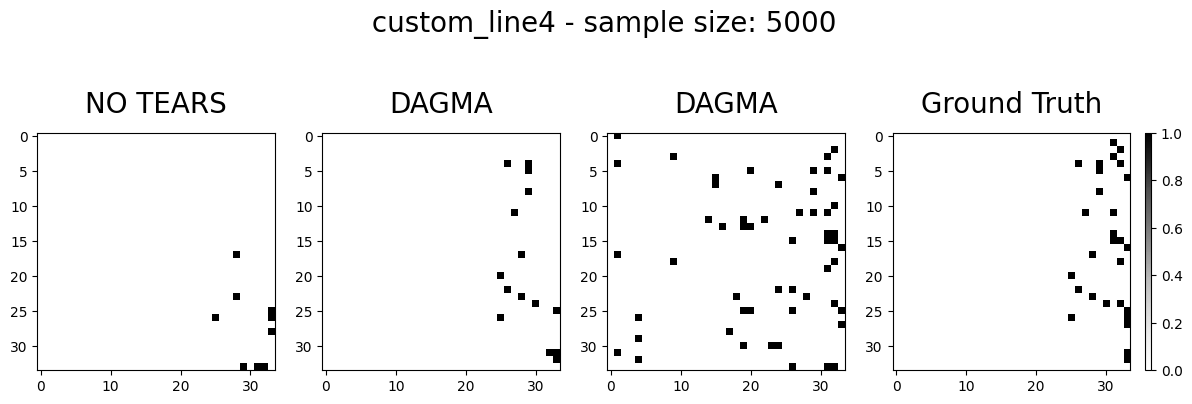

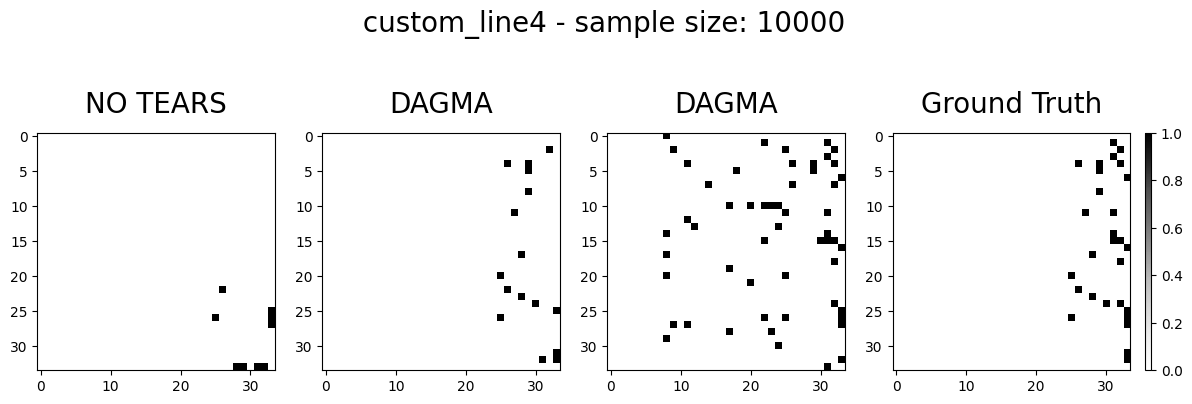

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify algorithms
algorithms = ['NotearsLinear', 'DagmaLinear',
            #   , 'GAE'
            #   , 'DirectLiNGAM',
             'PC'
              ]

# Specify sample sizes
sample_sizes = [500, 1000, 2000, 5000, 10000]

# Specify dataset
dataset = 'causalAssembly'
subset = 'custom_line4'

for sample_size in sample_sizes:

    # Create figure with as many subplots as algorithms plus one for the ground truth
    fig, axes = plt.subplots(1, len(algorithms) + 1, figsize=(15, 4), gridspec_kw={'width_ratios': [1] * len(algorithms) + [1]})

    # Set the overall title
    fig.suptitle(f' {subset} - sample size: {sample_size}', y = 1.1,  fontsize=20)

    # Create a subplot for each algorithm
    for i, algorithm in enumerate(algorithms):
        ax = axes[i]
        
        # Get the data
        adj_matrix = pd.read_csv(f'plots/adj_matrix_csv/{dataset}/{subset}/{algorithm}_{sample_size}.csv').to_numpy()

        match algorithm:
            case 'NotearsLinear':
                title = 'NO TEARS'
            case 'DagmaLinear':
                title = 'DAGMA'
            case 'GAE':
                title = 'GAE'
            
        ax.set_title(title, y= 1.05, fontsize = 20)
        map1 = ax.imshow(adj_matrix, cmap='Greys', interpolation='none')

    # Also plot the ground truth
    ax_ground_truth = axes[-1]
    adj_matrix_ground_truth = pd.read_csv(f'data/{dataset}/{subset}/{subset}_ground_truth.csv').to_numpy()
    
    ax_ground_truth.set_title('Ground Truth', y=1.05, fontsize = 20)
    map2 = ax_ground_truth.imshow(adj_matrix_ground_truth, cmap='Greys', interpolation='none')

    # Add colorbar
    cbar = fig.colorbar(map2, ax=axes, location='right', aspect=40, fraction=0.02, pad=0.04)
    cbar.ax.set_position([ax_ground_truth.get_position().x1 + 0.01, ax_ground_truth.get_position().y0, 0.02, ax_ground_truth.get_position().height])
    
plt.show()


comparison of runtimes

/tmp/ipykernel_20060/1192016969.py:56: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


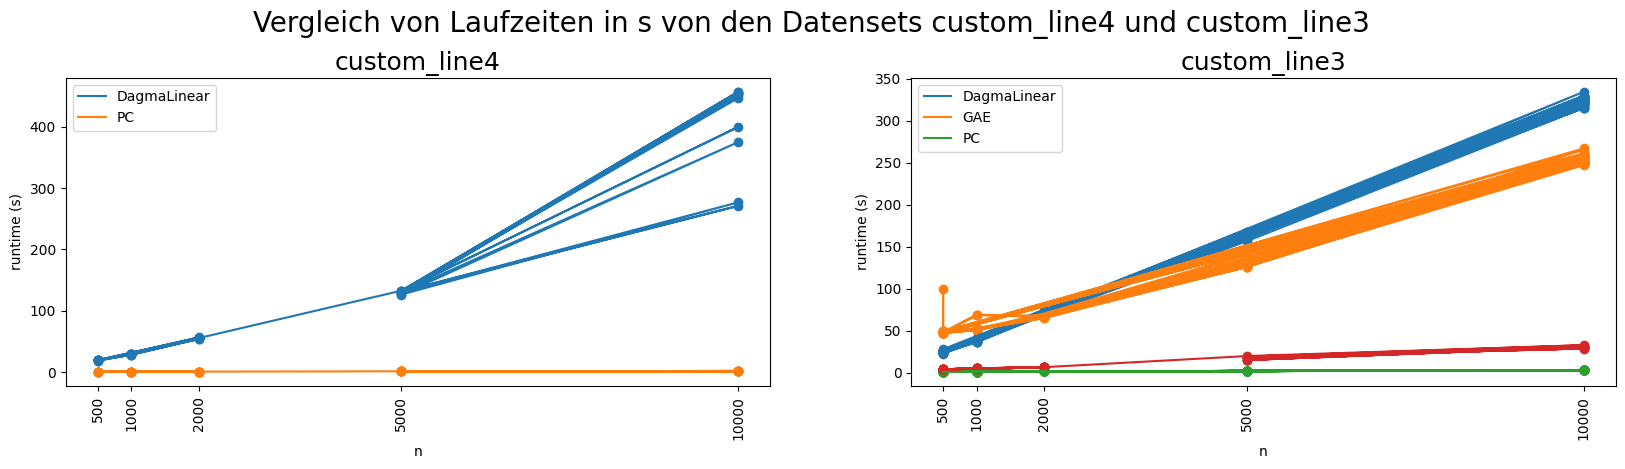

In [18]:
import matplotlib.pyplot as plt

algorithms = ['NotearsLinear', 'DagmaLinear', 'GAE'
              # , 'DirectLiNGAM', 'PC'
              ]

sample_sizes = [500, 1000, 2000, 5000, 10000]

datasets = ['causalAssembly']
subsets = ['custom_line4', 'custom_line3']

# load data
testing_results = pd.read_csv('testing_results.csv')
testing_results = testing_results.fillna(0)

# narrow down dataset
testing_results = testing_results[
                                    (testing_results['dataset'].isin(datasets))
                                  & (testing_results['subset'].isin(subsets))
                                #   (testing_results['date'] >= '2024-06-25 16:00:00')
                                  ]

fig, axs = plt.subplots(1, len(subsets), figsize = (20,4))
fig.suptitle(f'Vergleich von Laufzeiten in s von den Datensets {subsets[0]} und {subsets[1]} ', fontsize=20, y= 1.05)

for dataset in testing_results['dataset'].unique():
    for subset in testing_results[testing_results['dataset'] == dataset]['subset'].unique():
        subset_results = testing_results[(testing_results['dataset'] == dataset) & (testing_results['subset'] == subset)]

        # print (subset_results)

        # plot the runtime over n

        # Create a dictionary to store the data for each method
        method_data = {}
        
        for method in subset_results['method'].unique():
          method_results = subset_results[subset_results['method'] == method]
          x = method_results['n']
          y = method_results['runtime']
          
          # Store the data for each method
          method_data[method] = (x, y)
        
        # Plot the data for each method
        for method, (x, y) in method_data.items():
          ax.plot(x, y, label=method)
          ax.scatter(x, y)

          ax = axs[subsets.index(subset)]
          ax.set_title(subset, fontsize=18)
          ax.set_xlabel('n')
          ax.set_ylabel('runtime (s)')
          ax.set_xticks(sample_sizes)
          ax.tick_params(axis='x', labelrotation=90)
          ax.legend()



for each subset, show all metrics in different frames over n

,dataset,subset,algorithm,n,runs,shd_avg,shd_std,recall_avg,recall_std,precision_avg,precision_std,F1_avg,F1_std,runtime_avg,runtime_std
0,causalAssembly,custom_line4,DagmaLinear,500,10,20.0,0.0,0.3929,0.000000e+00,0.7857,1.170278e-16,0.5238,1.170278e-16,19.156261,0.282234
3,causalAssembly,custom_line4,DagmaLinear,1000,10,15.0,0.0,0.5357,1.170278e-16,0.8824,0.000000e+00,0.6667,1.170278e-16,28.894207,0.441727
6,causalAssembly,custom_line4,DagmaLinear,2000,10,13.0,0.0,0.5714,1.170278e-16,0.9412,0.000000e+00,0.7111,0.000000e+00,55.216906,0.862676
9,causalAssembly,custom_line4,DagmaLinear,5000,10,15.0,0.0,0.5000,0.000000e+00,0.9333,2.340556e-16,0.6512,0.000000e+00,130.374755,1.986507
12,causalAssembly,custom_line4,DagmaLinear,10000,10,14.0,0.0,0.5357,1.170278e-16,0.9375,0.000000e+00,0.6818,0.000000e+00,404.205271,74.070366
1,causalAssembly,custom_line4,NotearsLinear,500,10,26.0,0.0,0.1429,0.000000e+00,0.5000,0.000000e+00,0.2222,0.000000e+00,3.749510,0.080730
4,causalAssembly,custom_line4,NotearsLinear,1000,10,26.0,0.0,0.1786,2.925695e-17,0.5000,0.000000e+00,0.2632,0.000000e+00,4.887690,0.147722
7,causalAssembly,custom_line4,NotearsLinear,2000,10,25.0,0.0,0.1786,2.925695e-17,0.5556,0.000000e+00,0.2703,5.851389e-17,6.087868,0.115341
10,causalAssembly,custom_line4,NotearsLinear,5000,10,25.0,0.0,0.1786,2.925695e-17,0.5556,0.000000e+00,0.2703,5.851389e-17,17.286128,1.922889
13,causalAssembly,custom_line4,NotearsLinear,10000,10,25.0,0.0,0.1786,2.925695e-17,0.5556,0.000000e+00,0.2703,5.851389e-17,30.263059,1.094971


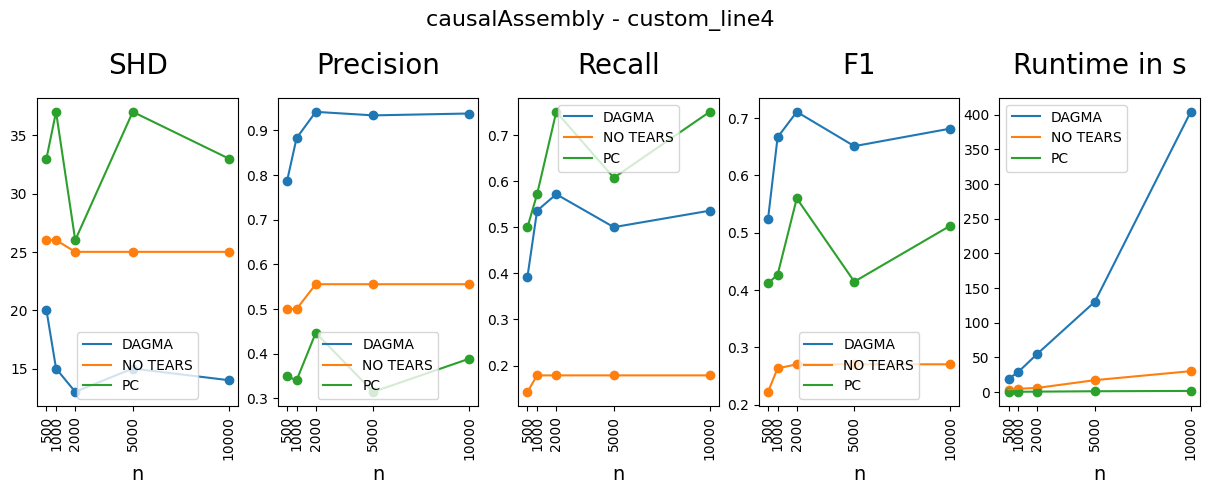

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### SETUP

# last m datapoints to be analyzed
m = 10

datasets = ['causalAssembly']
subsets = ['custom_line4']
sample_sizes = [500, 1000, 2000, 5000, 10000]



### IMPORT AND PREP

# import
testing_results = pd.read_csv('testing_results.csv')
testing_results = testing_results.fillna(0)

# narrow down dataset
testing_results = testing_results[
                                    (testing_results['dataset'].isin(datasets))
                                  & (testing_results['subset'].isin(subsets))
                                  & (testing_results['date'] >= '2024-06-28 16:00:00')
                                  ]

# take last 10 values each
testing_results = testing_results.groupby(['dataset', 'subset', 'n', 'method']).tail(10)

# sort values
testing_results.sort_values(by=['dataset', 'subset', 'n', 'method'], inplace=True)

# specify metrics
metrics = ['shd', 'precision', 'recall', 'F1', 'runtime']  





### CREATE METRICS

testing_results_evaluation = []

for dataset in testing_results['dataset'].unique():
    dataset_results = testing_results[testing_results['dataset'] == dataset]
    
    for subset in dataset_results['subset'].unique():
        subset_results = dataset_results[dataset_results['subset'] == subset]

        for n in subset_results['n'].unique():
            n_results = subset_results[subset_results['n'] == n]

            for algorithm in n_results['method'].unique():
                algorithm_results = n_results[n_results['method'] == algorithm]

                testing_results_evaluation.append({
                    'dataset': dataset,
                    'subset': subset,
                    'algorithm': algorithm,
                    'n': n,
                    'runs': m,
                    'shd_avg': algorithm_results['shd'].mean(),
                    'shd_std': algorithm_results['shd'].std(),
                    'recall_avg': algorithm_results['recall'].mean(),
                    'recall_std': algorithm_results['recall'].std(),
                    'precision_avg': algorithm_results['precision'].mean(),
                    'precision_std': algorithm_results['precision'].std(),
                    'F1_avg': algorithm_results['F1'].mean(),
                    'F1_std': algorithm_results['F1'].std(),
                    'runtime_avg': algorithm_results['runtime'].mean(),
                    'runtime_std': algorithm_results['runtime'].std()
                })

testing_results_evaluation = pd.DataFrame(testing_results_evaluation)
testing_results_evaluation = testing_results_evaluation.sort_values(by = ['dataset', 'subset', 'algorithm', 'n'])




### CREATE PLOTS

for dataset in testing_results_evaluation['dataset'].unique():
    dataset_results = testing_results_evaluation[testing_results_evaluation['dataset'] == dataset]
    
    for subset in dataset_results['subset'].unique():
        subset_results = dataset_results[dataset_results['subset'] == subset]

        # create subplots grid
        fig, axs = plt.subplots(1, len(metrics), figsize=(15, 4))
        fig.suptitle(f'{dataset} - {subset}', fontsize=16, y = 1.1)

        # go through all metrics 
        for i, metric in enumerate(metrics):
            ax = axs[i]

            # go through all methods/algorithms
            for method in subset_results['algorithm'].unique():
                # get last m values
                method_results = subset_results[subset_results['algorithm'] == method].tail(m)

                match method:
                    case 'NotearsLinear':
                        title_method = 'NO TEARS'
                    case 'DagmaLinear':
                        title_method = 'DAGMA'
                    case 'GAE':
                        title_method = 'GAE'
                    case 'PC':
                        title_method = 'PC'

                # plot
                ax.plot(method_results['n'], method_results[f'{metric}_avg'], label=title_method)
                ax.scatter(method_results['n'], method_results[f'{metric}_avg'])

                              
            match metric:
                case 'shd':
                    title_metric = 'SHD'
                case 'recall':
                    title_metric = 'Recall'
                case 'precision':
                    title_metric = 'Precision'
                case 'F1':
                    title_metric = 'F1'
                case 'runtime':
                    title_metric = 'Runtime in s'

            ax.set_title(title_metric, fontsize = 20, y= 1.05)
            ax.set_xlabel('n', fontsize = 14)
            ax.set_xticks(sample_sizes)
            ax.tick_params(axis='x', labelrotation=90)
            ax.legend()



        # plt.tight_layout()
        # plt.show()


testing_results_evaluation


create boxplots for last x values

/tmp/ipykernel_1104640/3237156399.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=labels)
/tmp/ipykernel_1104640/3237156399.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_1104640/3237156399.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=labels)
/tmp/ipykernel_1104640/3237156399.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


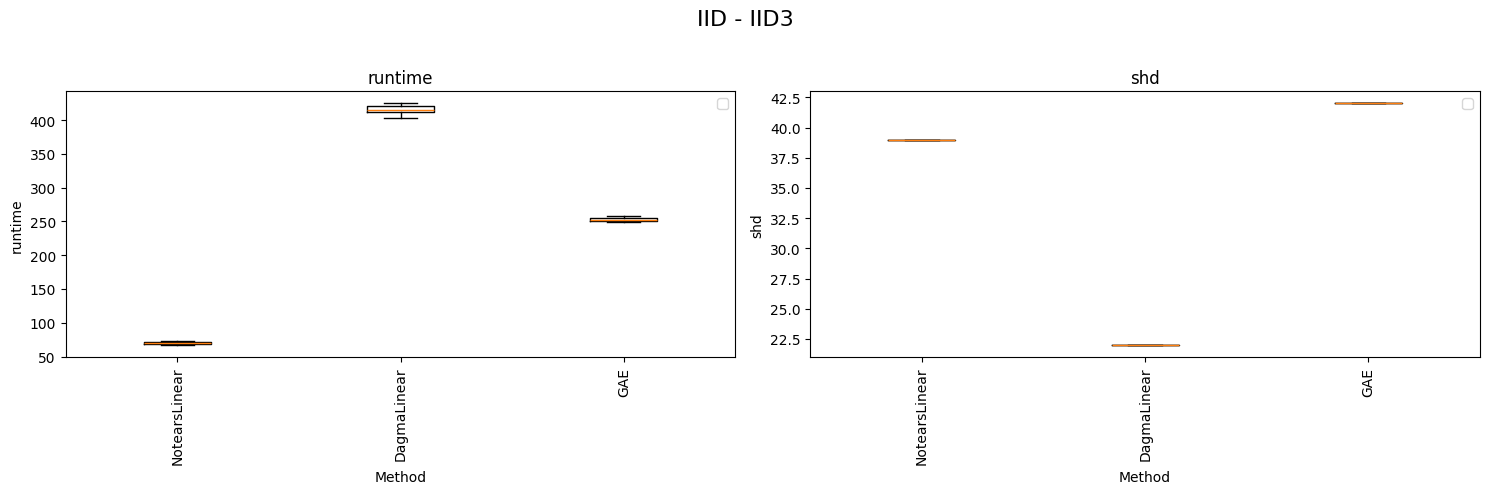

/tmp/ipykernel_1104640/3237156399.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=labels)
/tmp/ipykernel_1104640/3237156399.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/tmp/ipykernel_1104640/3237156399.py:46: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_to_plot, labels=labels)
/tmp/ipykernel_1104640/3237156399.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


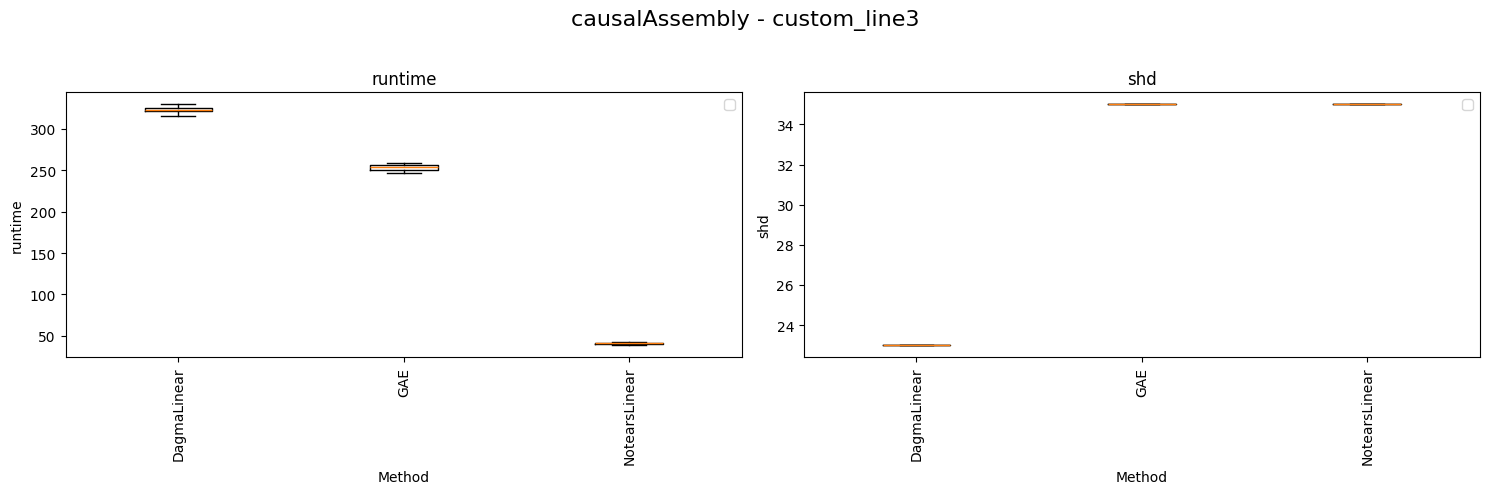

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
testing_results = pd.read_csv('testing_results.csv')
testing_results = testing_results.fillna(0)

# Filter dataset based on date
testing_results = testing_results[
    # (testing_results['dataset'] == 'causalAssembly')
    # & (testing_results['subset'] == 'custom_line')
    (testing_results['date'] >= '2024-06-28 16:00:00')
]

# Sort by dataset, subset, and n
testing_results.sort_values(by=['dataset', 'subset', 'n'], inplace=True)

# Specify metrics
metrics = ['runtime', 'shd']
sample_sizes = [500, 1000, 2000, 5000, 10000]

# Iterate over datasets and subsets
for dataset in testing_results['dataset'].unique():
    dataset_results = testing_results[testing_results['dataset'] == dataset]
    
    for subset in dataset_results['subset'].unique():
        subset_results = dataset_results[dataset_results['subset'] == subset]
        
        # Take the last 50 entries for the subset
        subset_results = subset_results.tail(50)

        # Create subplots
        fig, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        fig.suptitle(f'{dataset} - {subset}', fontsize=16)

        for i, metric in enumerate(metrics):
            ax = axs[i]
            data_to_plot = []
            labels = []
            
            for method in subset_results['method'].unique():
                method_results = subset_results[subset_results['method'] == method]
                data_to_plot.append(method_results[metric])
                labels.append(method)
            
            ax.boxplot(data_to_plot, labels=labels)
            ax.set_title(metric)
            ax.set_xlabel('Method')
            ax.set_ylabel(metric)
            ax.tick_params(axis='x', labelrotation=90)
            ax.legend()

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()
